In [1]:
import rdkit
from rdkit import Chem
from zlib import crc32

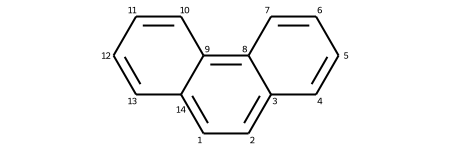

In [34]:
compound1 = "c12ccc3ccccc3c1cccc2"
mol = Chem.MolFromSmiles(compound1)

for i,atom in enumerate(mol.GetAtoms()):
    # For each atom, set the property "atomNote" to a index+1 of the atom
    idx = atom.GetIdx()
    atom.SetProp("atomNote", str(idx) if idx > 0 else str(14))

mol

In [35]:
def hash(l):
    """
    Return an integer from a list by hashing it
    """
    strl = "".join([str(i) for i in l])
    hash_int = crc32(strl.encode("utf8")) & 0xffffffff
    return hash_int

atoms_number = []
for atom in mol.GetAtoms():
    atoms_number.append([atom.GetAtomicNum()])
    
adj_list = [[] for i in range(len(atoms_number))]
for bond in mol.GetBonds():
    b = bond.GetBeginAtomIdx()
    e = bond.GetEndAtomIdx()
    
    adj_list[b].append(e)
    adj_list[e].append(b)
    
identifiers = [hash(i) for i in atoms_number]
print("Cycle #{}".format(1))
for i in range(2,9):
    print(identifiers[i])

new_identifiers = []
for i, identifier in enumerate(identifiers):
    hash_list = sorted(
        [identifiers[j] for j in  adj_list[i]]
    )
    hash_list.insert(0,identifier)
    
    new_identifiers.append(hash(hash_list))

print("Cycle #{}".format(2))
for i in range(2,9):
    print(new_identifiers[i])
    
identifiers = new_identifiers

new_identifiers = []
for i, identifier in enumerate(identifiers):
    hash_list = sorted(
        [identifiers[j] for j in  adj_list[i]]
    )
    hash_list.insert(0,identifier)
    
    new_identifiers.append(hash(hash_list))

print("Cycle #{}".format(2))
for i in range(2,9):
    print(new_identifiers[i])

Cycle #1
498629140
498629140
498629140
498629140
498629140
498629140
498629140
Cycle #2
4025316753
341472667
4025316753
4025316753
4025316753
4025316753
341472667
Cycle #2
898767062
3369306550
898767062
3858988828
3858988828
898767062
1365849003


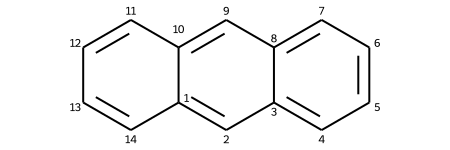

In [36]:
compound2 = "c12cc3ccccc3cc1cccc2"
mol2 = Chem.MolFromSmiles(compound2)

for atom in mol2.GetAtoms():
    # For each atom, set the property "atomNote" to a index+1 of the atom
    atom.SetProp("atomNote", str(atom.GetIdx()+1))

mol2

In [37]:
atoms_number = []
for atom in mol2.GetAtoms():
    atoms_number.append([atom.GetAtomicNum()])
    
adj_list = [[] for i in range(len(atoms_number))]
for bond in mol2.GetBonds():
    b = bond.GetBeginAtomIdx()
    e = bond.GetEndAtomIdx()
    
    adj_list[b].append(e)
    adj_list[e].append(b)
    
identifiers = [hash(i) for i in atoms_number]
print("Cycle #{}".format(1))
for i in range(1,8):
    print(identifiers[i])

new_identifiers = []
for i, identifier in enumerate(identifiers):
    hash_list = sorted(
        [identifiers[j] for j in  adj_list[i]]
    )
    hash_list.insert(0,identifier)
    
    new_identifiers.append(hash(hash_list))
    
print("Cycle #{}".format(2))
for i in range(1,8):
    print(new_identifiers[i])

identifiers = new_identifiers

new_identifiers = []
for i, identifier in enumerate(identifiers):
    hash_list = sorted(
        [identifiers[j] for j in  adj_list[i]]
    )
    hash_list.insert(0,identifier)
    
    new_identifiers.append(hash(hash_list))

print("Cycle #{}".format(3))
for i in range(1,8):
    print(new_identifiers[i])

Cycle #1
498629140
498629140
498629140
498629140
498629140
498629140
498629140
Cycle #2
4025316753
341472667
4025316753
4025316753
4025316753
4025316753
341472667
Cycle #3
577089397
3369306550
898767062
3858988828
3858988828
898767062
3369306550


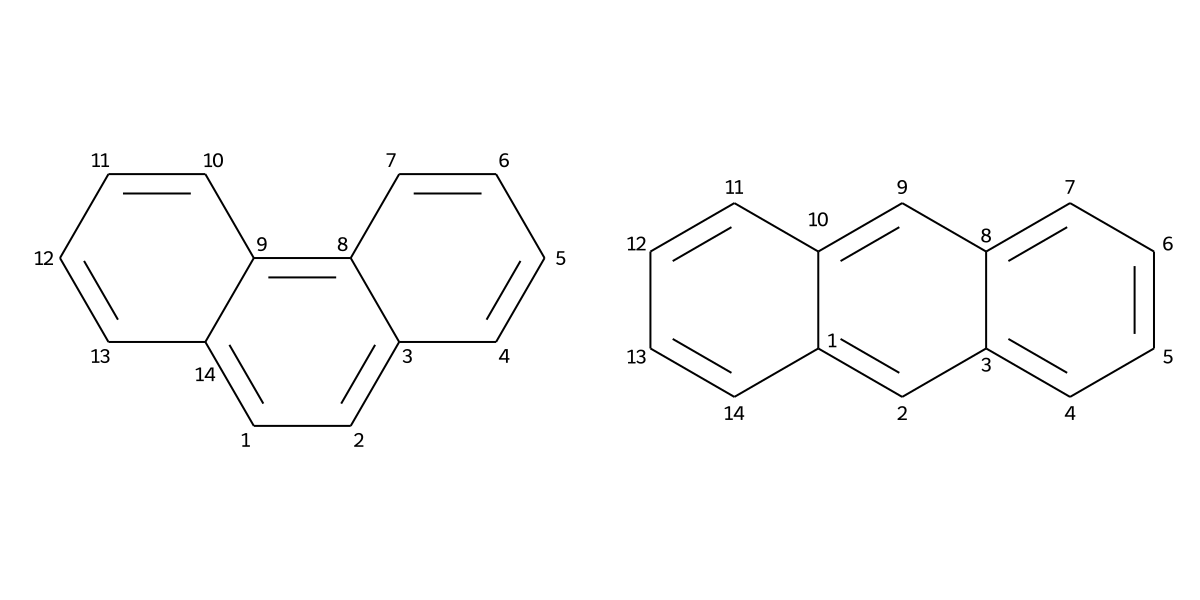

In [38]:
from rdkit.Chem import Draw
import PIL

img = Draw.MolsToGridImage([mol,mol2],molsPerRow=2,subImgSize=(600,600))
img